# Tweet Analysis 

This notebook is an analysis of company tweets. The goal is to see basic statistics about their performance, investigate relationships between different variables, perform text analysis, and try to predict engagement levels based on tweets' composition.

## Dataset
The dataset has been downloaded from Twitter. It comes in several separate csv files downloadd form Twitter analytics. The data was only available from April 2020. As much as I'd love to have more, Twitter doesn't store data going further back, or if it does, it doesn't make it available to the account owner. 

 
## Data Exploration

In [1]:
import pandas as pd
import glob
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#concat all csvs into one df

path =r'Files'
allFiles = glob.glob(path + "/*.csv")
frame = pd.DataFrame()
list_ = []
for file_ in allFiles:
    df = pd.read_csv(file_,index_col=None, header=0)
    list_.append(df)
    
df = pd.concat(list_)
df.head(2)

,Tweet id,Tweet permalink,Tweet text,time,impressions,engagements,engagement rate,retweets,replies,likes,...,promoted hashtag clicks,promoted detail expands,promoted permalink clicks,promoted app opens,promoted app installs,promoted follows,promoted email tweet,promoted dial phone,promoted media views,promoted media engagements
0,1289263381870854146,https://twitter.com/makingjam/status/128926338...,🚨 Last clue! \nWho's the host of #JAMOnline202...,2020-07-31 18:15 +0000,252.0,0.0,0.000000,0.0,0.0,0.0,...,-,-,-,-,-,-,-,-,-,-
1,1289233205497798657,https://twitter.com/makingjam/status/128923320...,Can YOU guess who the host of #JAMOnline2020 i...,2020-07-31 16:15 +0000,281.0,2.0,0.007117,0.0,0.0,1.0,...,-,-,-,-,-,-,-,-,-,-


In [3]:
df.dtypes

Tweet id                          int64
Tweet permalink                  object
Tweet text                       object
time                             object
impressions                     float64
engagements                     float64
engagement rate                 float64
retweets                        float64
replies                         float64
likes                           float64
user profile clicks             float64
url clicks                      float64
hashtag clicks                  float64
detail expands                  float64
permalink clicks                float64
app opens                         int64
app installs                      int64
follows                           int64
email tweet                       int64
dial phone                        int64
media views                       int64
media engagements                 int64
promoted impressions             object
promoted engagements             object
promoted engagement rate         object


There are many columns that will not be necessary, and/or have too many 0's or NaNs to be useful. We will remove them to keep only the columns that will be helpful for our analysis.

In [4]:
#create a new df keeping only the useful columns
df_new = df[['Tweet text','time','impressions','engagements','engagement rate','retweets','replies','likes', 'user profile clicks', 'url clicks', 'hashtag clicks', 'detail expands', 'permalink clicks']]
df_new.head(2)

,Tweet text,time,impressions,engagements,engagement rate,retweets,replies,likes,user profile clicks,url clicks,hashtag clicks,detail expands,permalink clicks
0,🚨 Last clue! \nWho's the host of #JAMOnline202...,2020-07-31 18:15 +0000,252.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Can YOU guess who the host of #JAMOnline2020 i...,2020-07-31 16:15 +0000,281.0,2.0,0.007117,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


In [5]:
#check for nans
df = df.replace('-',np.nan)
df.isna().sum()

Tweet id                          0
Tweet permalink                   0
Tweet text                        0
time                              0
impressions                       0
engagements                       0
engagement rate                   1
retweets                          0
replies                           0
likes                             0
user profile clicks               0
url clicks                        0
hashtag clicks                    0
detail expands                    0
permalink clicks                  0
app opens                         0
app installs                      0
follows                           0
email tweet                       0
dial phone                        0
media views                       0
media engagements                 0
promoted impressions            530
promoted engagements            530
promoted engagement rate        530
promoted retweets               530
promoted replies                530
promoted likes              

In [6]:
#drop one row with a nan in the engagement rate
df_new = df_new.dropna()
df_new.isna().sum()

Tweet text             0
time                   0
impressions            0
engagements            0
engagement rate        0
retweets               0
replies                0
likes                  0
user profile clicks    0
url clicks             0
hashtag clicks         0
detail expands         0
permalink clicks       0
dtype: int64

## Data Cleaning 
Some transformations are needed to proces the data later.

In [7]:
#split the time column into hour and date
df_new['date'] = df_new['time'].astype(str)

In [8]:
# split date into 3 columns
df_new[['date_1','hour','remove']] = df_new['date'].astype(str).str.split(expand=True)

In [9]:
df_new.head(2)

,Tweet text,time,impressions,engagements,engagement rate,retweets,replies,likes,user profile clicks,url clicks,hashtag clicks,detail expands,permalink clicks,date,date_1,hour,remove
0,🚨 Last clue! \nWho's the host of #JAMOnline202...,2020-07-31 18:15 +0000,252.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2020-07-31 18:15 +0000,2020-07-31,18:15,+0000
1,Can YOU guess who the host of #JAMOnline2020 i...,2020-07-31 16:15 +0000,281.0,2.0,0.007117,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,2020-07-31 16:15 +0000,2020-07-31,16:15,+0000


In [10]:
#drop unnecessary columns
df_new = df_new.drop(labels=['time','date','remove'], axis=1)
df_new.head(2)

,Tweet text,impressions,engagements,engagement rate,retweets,replies,likes,user profile clicks,url clicks,hashtag clicks,detail expands,permalink clicks,date_1,hour
0,🚨 Last clue! \nWho's the host of #JAMOnline202...,252.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2020-07-31,18:15
1,Can YOU guess who the host of #JAMOnline2020 i...,281.0,2.0,0.007117,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,2020-07-31,16:15


In [11]:
from datetime import datetime

In [12]:
df_new['hour']= df_new['hour'].astype(str)

In [13]:
#format hour column as date time
df_new['hour'] = pd.to_datetime(df_new['hour'], format='%H:%M').dt.time

In [14]:
#format date column as date time
df_new['date_1'] = pd.to_datetime(df_new['date_1'], format='%Y-%m-%d')

In [15]:
df_new.head(2)

,Tweet text,impressions,engagements,engagement rate,retweets,replies,likes,user profile clicks,url clicks,hashtag clicks,detail expands,permalink clicks,date_1,hour
0,🚨 Last clue! \nWho's the host of #JAMOnline202...,252.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2020-07-31,18:15:00
1,Can YOU guess who the host of #JAMOnline2020 i...,281.0,2.0,0.007117,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,2020-07-31,16:15:00


In [16]:
#add weekday column 
df_new['day'] = df_new['date_1'].dt.weekday
df_new['day_name'] = df_new['date_1'].dt.day_name()
df_new.head(2)

,Tweet text,impressions,engagements,engagement rate,retweets,replies,likes,user profile clicks,url clicks,hashtag clicks,detail expands,permalink clicks,date_1,hour,day,day_name
0,🚨 Last clue! \nWho's the host of #JAMOnline202...,252.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2020-07-31,18:15:00,4,Friday
1,Can YOU guess who the host of #JAMOnline2020 i...,281.0,2.0,0.007117,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,2020-07-31,16:15:00,4,Friday


In [17]:
#rename columns
df_new.columns

Index(['Tweet text', 'impressions', 'engagements', 'engagement rate',
       'retweets', 'replies', 'likes', 'user profile clicks', 'url clicks',
       'hashtag clicks', 'detail expands', 'permalink clicks', 'date_1',
       'hour', 'day', 'day_name'],
      dtype='object')

In [18]:
#rename columns
df_new = df_new.rename(columns = {'Tweet text':'text',
                                  'user profile clicks':'profile_clicks', 'url clicks':'url_clicks', 'engagement rate':'engagement_rate',
                                  'hashtag clicks':'hashtag_clicks', 'detail expands':'detail_expands',
                                  'permalink clicks':'permalink_clicks',
                                  'date_1':'date'
                                })
#check
df_new.columns

Index(['text', 'impressions', 'engagements', 'engagement_rate', 'retweets',
       'replies', 'likes', 'profile_clicks', 'url_clicks', 'hashtag_clicks',
       'detail_expands', 'permalink_clicks', 'date', 'hour', 'day',
       'day_name'],
      dtype='object')

### Adding variables

We can create a few extra columns with basic stats about the tweets. 
* Count of hashtags in each tweet
* Count of mentions in each tweet

In [19]:
#create a column with # & mention count
def hm_count(row, h_or_m):
    c = row.count(h_or_m)
    return c

df_new['sum_hashtags']= df_new['text'].apply(lambda row: hm_count(row,'#'))  
df_new['sum_mentions']= df_new['text'].apply(lambda row: hm_count(row,'@'))  

In [20]:
tweets_sorted = df_new['date'].sort_values(ascending=True)

earliest_tweet = tweets_sorted.head(1).iloc[0].strftime("%Y-%m-%d")
latest_tweet = tweets_sorted.tail(1).iloc[0].strftime("%Y-%m-%d")

In [21]:
#calculate averages
print(df_new.describe().loc['mean'])

impressions         474.313800
engagements           9.158790
engagement_rate       0.018731
retweets              0.440454
replies               0.198488
likes                 1.026465
profile_clicks        1.347826
url_clicks            1.500945
hashtag_clicks        0.047259
detail_expands        2.620038
permalink_clicks      0.000000
day                   2.192817
sum_hashtags          1.202268
sum_mentions          1.325142
Name: mean, dtype: float64


In [22]:
print(df_new.describe().loc['min']['impressions'])
print(df_new.describe().loc['max']['impressions'])

10.0
7822.0


The range of values for the impressions column is very big. We will investigate it closer later.

In [23]:
print(f'''Basic stats about the dataset:
\nThe full dataset includes all tweets between {earliest_tweet} , and, {latest_tweet}.
\nThere are {len(df_new)} tweets in the dataset.
''')

Basic stats about the dataset:

The full dataset includes all tweets between 2020-04-01 , and, 2020-09-20.

There are 529 tweets in the dataset.



## 1. Handling hashtags

We use many hashtags in our company tweets, it will be interesting to see which ones are most popular.

In [24]:
# count number of mentions or hashtags
# takes in the symbol, returns an object with number of unique items, sorted frequency, a list of all itmes, top 10
# in the WHOLE dataset

def extract_list(hashtag_or_mention):
    item_list = []
    for row in df_new['text']:
        items = [tag.strip(hashtag_or_mention) for tag in row.split() if tag.startswith(hashtag_or_mention)]
        punct = [".","?","!",":","'","]","[",";",","]
        #remove punctuation from, it leaves us with a list of letters
        item_no_punct = [[l for l in item if l not in punct] for item in items]
        #joint the letters back into words
        items_formated = [''.join(item) for item in item_no_punct]
        item_list.append(items_formated)

    #turn a list of lists into one list
    items_list_all = [item for sublist in item_list for item in sublist]
    #turn into a set to chck uniques
    uniques = list(set(items_list_all))
    #count uniques
    number_of_unique_items = len(uniques)
    # frequency dict
    frequency_dict = {i: items_list_all.count(i) for i in items_list_all}
    # convert into df 
    frequency_df = pd.DataFrame(frequency_dict.items(), columns=["word", "count"])
    #sort values
    sorted_frequency = frequency_df.sort_values(by='count',ascending=False)
    
    #get top 10 values
    top_10_df = sorted_frequency.head(10)
    top_10 = list(top_10_df['word'])
    
    class i_list:
        def __init__(self):
#             no_uniques, list_uniques, full_list
            self.no_uniques = number_of_unique_items
            self.list_uniques = uniques
            self.full_list = items_list_all
            self.sorted_frequency = sorted_frequency
            self.top_10 = top_10
        def how_many(self):
            return f"This set of tweets has {self.no_uniques} unique {hashtag_or_mention}s."
        def list_top_10(self):
            return f"The top 10 {hashtag_or_mention}s used in this set of tweets are: {self.top_10}."
        
    item_list = i_list()
    
    return item_list

In [25]:
hashtag_list = extract_list('#')
hashtag_list.how_many()

'This set of tweets has 64 unique #s.'

In [26]:
#print the first 5 of the uniques
hashtag_list.list_uniques[:5]

['weekend', 'FridayFunDay', 'design', 'TheRemotePM', 'JAMLondon2020']

In [27]:
hashtag_list.list_top_10()

"The top 10 #s used in this set of tweets are: ['product', 'TheRemotePM', 'JAMOnline2020', 'JAMLondon', 'prodmgmt', 'design', 'pmot', 'remote', 'JAMBarcelona', 'agile']."

In [28]:
hashtag_frequency_df = hashtag_list.sorted_frequency

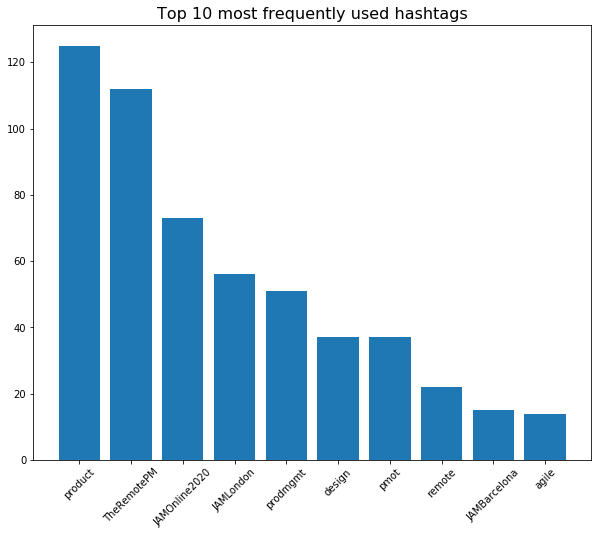

In [29]:
#plot top 10 most frequently used hashtags
fig, ax = plt.subplots(figsize=(10,8))

labels = hashtag_frequency_df['word'][:10]
y = hashtag_frequency_df['count'][:10]
x = np.arange(len(labels))

_ = plt.bar(x, height=y)

# ax.set_xticklabels(labels)
plt.xticks(x, labels, rotation=45)
plt.title("Top 10 most frequently used hashtags", fontsize=16)
plt.show()

In [30]:
# create a column with all hashtags per tweet
# function to extract all hashtags or mentions 

def extractor(row, hashtag_or_mention):
    words = [tag.strip(hashtag_or_mention) for tag in row.split() if tag.startswith(hashtag_or_mention)]
    punct = [".","?","!",":","'","]","[",";"]
    #remove punctuation from hashtags, it leaves us with a list of letters
    no_punct = [[l for l in item if l not in punct] for item in words]
    #join the letters back into words
    words_formated = [''.join(item) for item in no_punct]
    return words_formated

df_new['hashtags_list'] = df_new['text'].apply(lambda x: extractor(x, '#'))

#clean column
df_new['hashtags_list'] = df_new['hashtags_list'].astype(str).str.replace(']','').str.replace('[','').str.replace("'","")

#check
df_new['hashtags_list'].head(2)

0    JAMOnline2020
1    JAMOnline2020
Name: hashtags_list, dtype: object

In [31]:
#create a new df for further transformation
hash_df = df_new[['date', 'hour', 'day', 'hashtags_list','sum_hashtags']]

# set date as index
hash_df_re = hash_df.set_index('date')

In [32]:
# group by day and show sum on hashtags used per day
hash_sum_by_day = hash_df_re.resample('D').sum()
hash_sum_by_day.drop(columns="day", inplace=True)

In [33]:
# add column with number of tweets a day
# get number of hashtags a day and sort by date
tweets_per_day = hash_df_re.index.value_counts().sort_index()

#join on index with the previous df
hash_and_tweet=hash_sum_by_day.join(tweets_per_day)

#rename the added column
hash_and_tweet = hash_and_tweet.rename(columns={'date':'sum_tweets'})

# turn nans to 0s & convert to interger
hash_and_tweet['sum_tweets'] = hash_and_tweet['sum_tweets'].fillna('0').astype(int)

#check
hash_and_tweet.head()

,sum_hashtags,sum_tweets
date,,
2020-04-01,3,4
2020-04-02,5,4
2020-04-03,9,6
2020-04-04,0,0
2020-04-05,0,1


In [34]:
#check ratios
tweet_sum = hash_and_tweet['sum_tweets'].sum()
hash_sum = hash_and_tweet['sum_hashtags'].sum()
ht_ratio = hash_sum/tweet_sum
print("Overall there has been", tweet_sum, "tweets sent in the time period and", hash_sum, 
     "hashtags used. This gives a ratio of", round(ht_ratio,2), "which means there is an average of just over 1 hashtag per tweet.")

Overall there has been 529 tweets sent in the time period and 636 hashtags used. This gives a ratio of 1.2 which means there is an average of just over 1 hashtag per tweet.


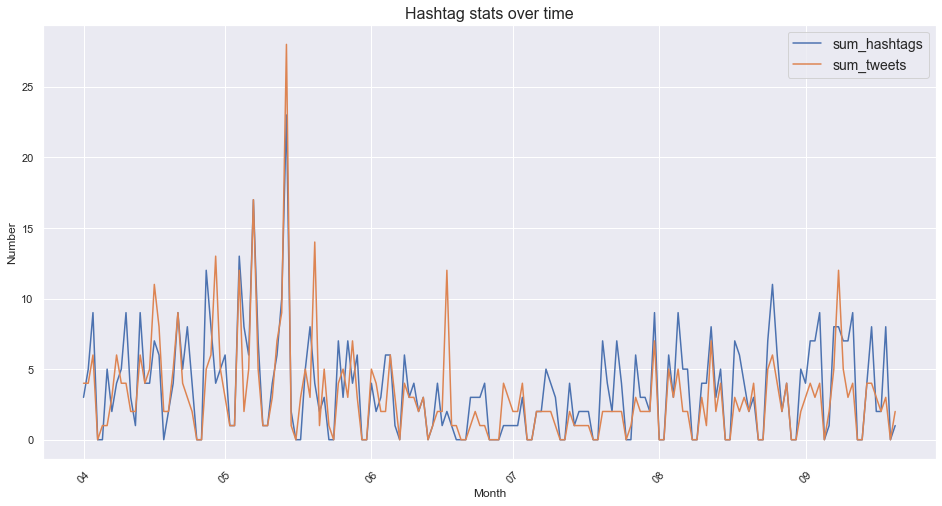

In [35]:
# plot number of hashtags and tweets per day
import matplotlib.dates as mdates
import seaborn as sns
sns.set()

def plot_hash_by_day(variable_1, variable_2=None):
    fig, ax = plt.subplots(figsize=(16,8))

    #set xand y axes
    x = hash_and_tweet.index
    y = hash_and_tweet[variable_1]

    #plot
    ax.plot(x, y, label=variable_1)
    
    #add other plots if variables given
    if variable_2 != None:
        y1 = hash_and_tweet[variable_2]
        ax.plot(x, y1, label=variable_2)

    months = mdates.MonthLocator() 
    month_fmt = mdates.DateFormatter('%m')

    ax.xaxis.set_major_locator(months)
    ax.xaxis.set_major_formatter(month_fmt)
    ax.tick_params(axis='x', rotation=45)

    ax.set_title("Hashtag stats over time", fontsize=16)
    ax.set_ylabel('Number') 
    ax.set_xlabel('Month')

    plt.legend(fontsize=14)
    plt.show()
    
plot_hash_by_day('sum_hashtags', 'sum_tweets')

There number of tweets and number of hashtags seem to closely follow each other which suggests that there is almost the same number of tweets and instances of using hashtags. 

In [36]:
print(f"This is consistent with the ratio of {round(ht_ratio,2)} (hashtags to tweets) we found before.")

This is consistent with the ratio of 1.2 (hashtags to tweets) we found before.


In [37]:
# add a column for all ratios
hash_and_tweet['ratios'] = hash_and_tweet['sum_hashtags']/ hash_and_tweet['sum_tweets']

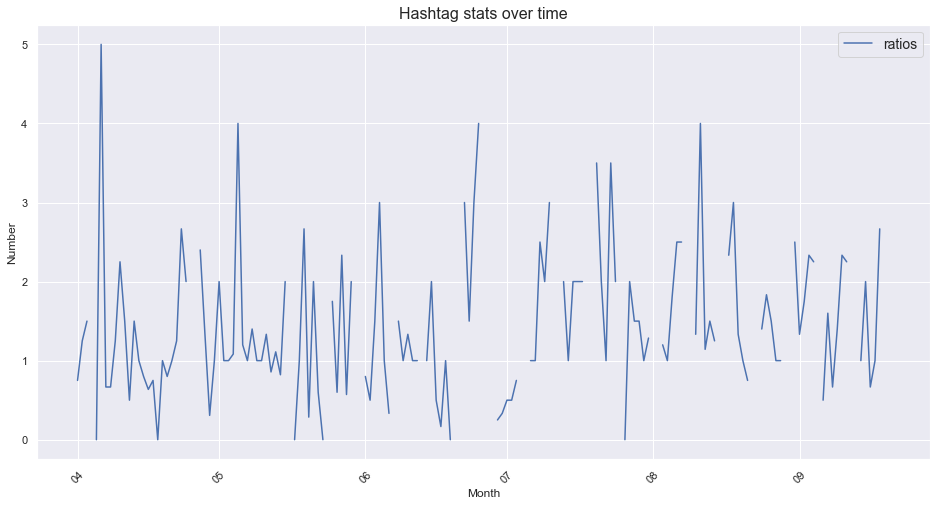

In [38]:
plot_hash_by_day(variable_1='ratios')

### Plotting the use of a specific hashtag over time

In [39]:
#create a new df for vectorization
h_df = df_new[['date', 'hashtags_list']]

In [40]:
# create a vectorized df
from sklearn.feature_extraction.text import CountVectorizer

# instantiate vectorizer
vectorizer = CountVectorizer()

#transform the column with hashtags
X = vectorizer.fit_transform(h_df['hashtags_list'])

In [41]:
#turn the vectorized representaiton into a dataframe
columns = vectorizer.get_feature_names()
hahstags_vectorized = pd.DataFrame(data=X.toarray(), index=h_df['date'], columns=columns)

#check its beauty
hahstags_vectorized.head(2)

,agile,apps,career,communication,design,designers,dev,editframe,event,events,...,throwbackthursday,throwbacktuesday,thursdaythoughts,tips,tuesdaythoughts,ux,wednesdaymotivation,weekend,wfh,womenintech
date,,,,,,,,,,,,,,,,,,,,,
2020-07-31,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2020-07-31,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


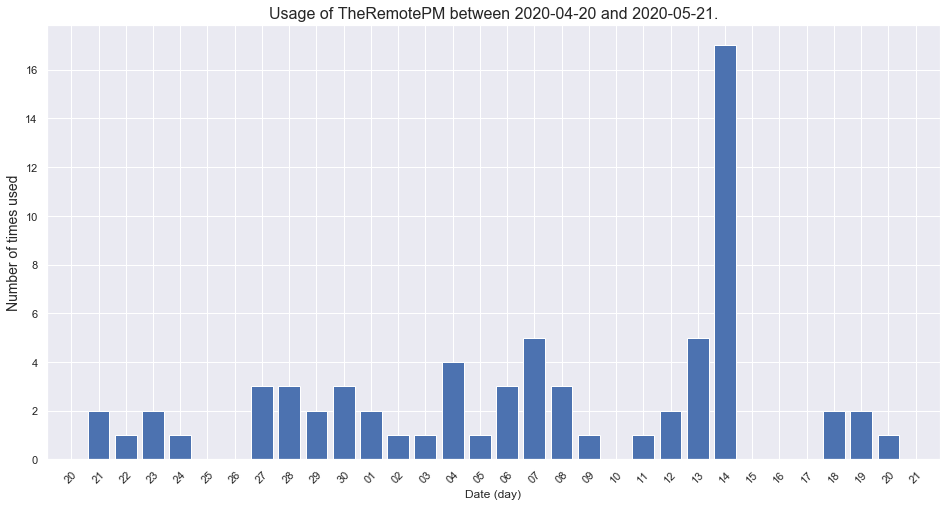

In [42]:
#function to plot hashtags and mentions over a time period

def plot_usage(vectorized_dataframe, hashtag_or_mention, date1, date2):
    #resample the vctorized df to group by day
    df_vectorized_re = vectorized_dataframe.resample('D').sum()
    #filter by date
    df_filtered = df_vectorized_re[(df_vectorized_re.index > date1) & (df_vectorized_re.index < date2)]
    
    #standardise input
    h_m =hashtag_or_mention.lower()
    
    #plot figure
    fig, ax = plt.subplots(figsize=(16,8))
                           
    x = df_filtered.index
    height = df_filtered[h_m]
    
    #format x axis
    days = mdates.DayLocator() 
    day_fmt = mdates.DateFormatter('%d')

    ax.xaxis.set_major_locator(days)
    ax.xaxis.set_major_formatter(day_fmt)
    ax.tick_params(axis='x', rotation=45)

    title = f"Usage of {hashtag_or_mention} between {date1} and {date2}." 
    ax.set_title(title, fontsize=16)
    ax.set_ylabel('Number of times used', fontsize=14) 
    ax.set_xlabel('Date (day)')

    plt.bar(x=x, height=height)

    plt.show()
    
plot_usage(hahstags_vectorized, 'TheRemotePM', date1='2020-04-20', date2='2020-05-21')

### Most used hashtag in a time period
It could be useful to now the most used hashtag in a specific time period.

In [43]:
# get the most used hashtag or mention in a specified time period
def most_used_h_or_m(vectorized_dataframe, date1, date2):
    vectorized_dataframe_re = vectorized_dataframe.resample('D').sum()
    #filter by date
    df_filtered = vectorized_dataframe_re[(vectorized_dataframe_re.index > date1) & (vectorized_dataframe_re.index < date2)]
    sums = df_filtered.sum(axis=0)
    sums_sorted = sums.sort_values(ascending=False)
    top = sums_sorted.head(1)
    name = top.index[0]
    value = top[0]
    return name, value

In [44]:
most_used_h_or_m(hahstags_vectorized, '2020-06-01', '2020-06-30')

('product', 14)

In [45]:
most_used_whole_set = most_used_h_or_m(hahstags_vectorized, earliest_tweet, latest_tweet)
print(f"The most used hashtag in the whole dataset is: {most_used_whole_set[0]}, with {most_used_whole_set[1]} mentions.")

The most used hashtag in the whole dataset is: product, with 127 mentions.


## 2. Analysis of mentions

For the analysis of mentions we'll follow the same process as for the hashtags. 

We can use the same function to get all the basic stats.

In [46]:
mention_list = extract_list("@")
mention_list.how_many()

'This set of tweets has 264 unique @s.'

In [47]:
mention_list.list_uniques

['',
 'gibsonbiddle',
 'weareberyl',
 'Onfido',
 'OcadoTechnology',
 'kylebaptista',
 'TechDailyCFP',
 'basecamp',
 'overflowapp',
 'wordpressdotcom',
 'iblokh',
 'ProdMgmtF',
 'sarahM',
 'enjoyhq',
 'fionamclaren',
 'Hermesparcels',
 'RianVDM',
 'chagarwa',
 'smyaneva',
 'Sabrina_Rzepka',
 'phillipcaudell',
 'Bernardo_Fabio',
 'AngelJaime',
 'ToveSvensson',
 'OReillyMedia',
 'jamesgill',
 'NODESKco',
 'onfido',
 'gopractice',
 'carwowuk',
 'Landyachtz',
 'thjmay',
 'hugocornejo',
 'codegram',
 'CatTouchThis',
 'fimacdougall',
 'InVisionApp’s',
 'nikoatwork',
 'SecretLDN',
 'LouisPeitzman',
 'GoodMarketingHQ',
 'h1brd',
 'linguisttina',
 'sdweiss',
 'pantelisak',
 'womeninproduct',
 'AndreaJezovit',
 'samrosekirkland',
 'LBraunschvig',
 'laraisuncool',
 'marinasini',
 'natamas',
 'herbigt',
 'chadjennings',
 'sebastienphl',
 '_voina_',
 'nocodetech',
 'tambuildsthings',
 'GoSquared',
 'Prototypr',
 'editframe',
 'madsviktor',
 'SophieHerb',
 'Comeconspire',
 'alexisod',
 'FutureLearn',

In [48]:
mention_list.list_top_10()

"The top 10 @s used in this set of tweets are: ['mattlemay', 'Mathilde_Leo', 'triangirlsocial', 'gibsonbiddle', 'susanavlopes', 'Sofiaqt', 'kvitoratos', 'herbigt', 'Kosta_kolev', 'alexisod']."

In [49]:
mention_list_df = mention_list.sorted_frequency
mention_list_df.head(5)

,word,count
0,mattlemay,36
51,Mathilde_Leo,22
84,triangirlsocial,21
7,gibsonbiddle,18
20,susanavlopes,18


In [50]:
#use the previous extractor function to create a column with a list of mentions
df_new['mentions_list'] = df_new['text'].apply(lambda x: extractor(x, '@'))
#clean column
df_new['mentions_list'] = df_new['mentions_list'].astype(str).str.replace(']','').str.replace('[','').str.replace("'","")

#check
df_new['mentions_list']

0                         
1      mattlemay, SunilUXD
2                         
3                         
4     intercom, cindychang
              ...         
63                        
64          CodeFirstGirls
65          womeninproduct
66     busuu, antoinesakho
67                  seifip
Name: mentions_list, Length: 529, dtype: object

In [51]:
#create a new df to work on
at_df = df_new[['date', 'day', 'mentions_list','sum_mentions']]
at_df_re = at_df.set_index('date')
at_df_re.head(2)

,day,mentions_list,sum_mentions
date,,,
2020-07-31,4,,0
2020-07-31,4,"mattlemay, SunilUXD",2


We can now create a new dataframe and vectorize to be able to easily plot usage of a chosen mention.

In [52]:
m_df = df_new[['date','mentions_list']]

In [53]:
# transform the mentions list
X = vectorizer.fit_transform(m_df['mentions_list'])

#create new df
mentions_vectorized = pd.DataFrame(X.toarray(), index=m_df['date'], columns=vectorizer.get_feature_names())
#check
mentions_vectorized.head(2)

,6nomads_com,_shaunrussell,_voina_,aarongraves,ac_f,adobemax,aha_io,alex_danco,alexisod,allwomentech,...,uptimeapp,vallsjordi,vivektweetsso,weareberyl,whatkatiedoes,wikimedia,williamnutt,womeninproduct,wordpressdotcom,wswannell
date,,,,,,,,,,,,,,,,,,,,,
2020-07-31,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2020-07-31,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


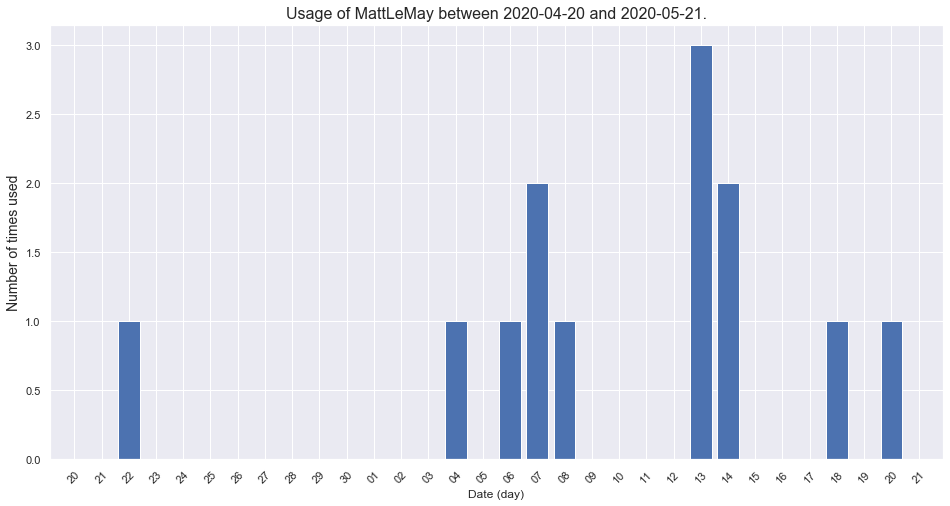

In [54]:
# use the previously written funciton to plot the use of a chosen mention
plot_usage(mentions_vectorized, 'MattLeMay', date1='2020-04-20', date2='2020-05-21')

In [55]:
most_used_mention = most_used_h_or_m(mentions_vectorized, earliest_tweet, latest_tweet)
print(f"The most used mention in the whole dataset is {most_used_mention[0]}, with {most_used_mention[1]} mentions.")

The most used mention in the whole dataset is mattlemay, with 37 mentions.


## Engagement rate column

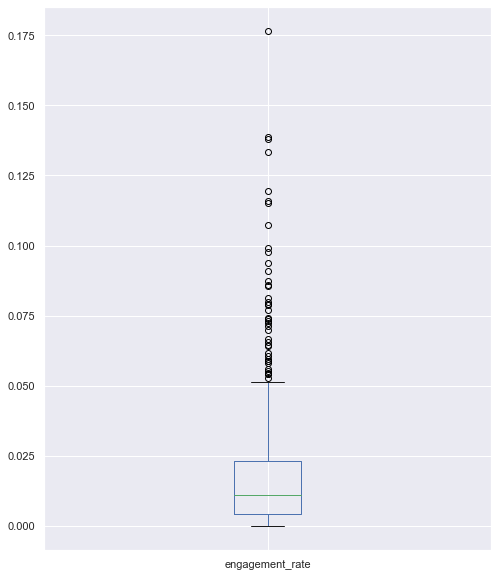

In [56]:
fig = plt.figure(figsize=(8,10))
df_new['engagement_rate'].plot.box()

In [57]:
df_new['engagement_rate'].describe()

count    529.000000
mean       0.018731
std        0.023584
min        0.000000
25%        0.004057
50%        0.010753
75%        0.023179
max        0.176471
Name: engagement_rate, dtype: float64

We can classify anything above the mean as success. 

In [58]:
m = max(df_new['engagement_rate'])
m

0.17647058823529413

In [59]:
def ecdf(data):

    # Number of data points: n
    n = len(data)

    # x-data for the ECDF: x
    x = np.sort(data)

    # y-data for the ECDF: y
    y = np.arange(1, n+1) / n

    return x, y

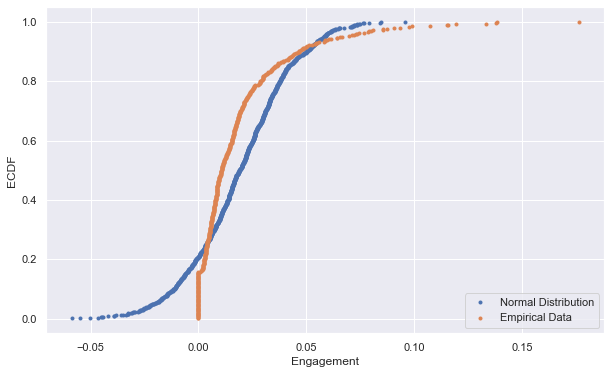

In [60]:
#plot ecdf 
#empirical data
x,y = ecdf(df_new['engagement_rate'])

mean = df_new['engagement_rate'].mean()
std = df_new['engagement_rate'].std()
samples = np.random.normal(mean, std, 1000)

#theoretical data
x_theor, y_theor = ecdf(samples)

plt.figure(figsize=(10,6))
plt.plot(x_theor, y_theor, marker=".", linestyle="none")
plt.plot(x, y, marker=".", linestyle="none")

plt.xlabel("Engagement")
plt.ylabel("ECDF")
plt.legend(('Normal Distribution', 'Empirical Data'), loc='lower right')

In [61]:
from scipy import stats

In [62]:
print(stats.normaltest(df_new["engagement_rate"]))

NormaltestResult(statistic=314.1135213126539, pvalue=6.1818078451126e-69)


Comment:   -_-

## 3. Emoji analysis

In [63]:
#tokenize the text to get words 
import nltk
from nltk.tokenize import sent_tokenize, word_tokenize

def tokenizer(text):
    tokens = nltk.word_tokenize(text)
    return tokens

In [64]:
df_new['text_tokenized'] = df_new['text'].apply(tokenizer)
df_new['text_tokenized']

0     [🚨, Last, clue, !, Who, 's, the, host, of, #, ...
1     [Can, YOU, guess, who, the, host, of, #, JAMOn...
2     [What, do, you, think, JAM, stands, for, ?, 🟡,...
3     [Guess, :, who, ’, s, the, host, of, #, JAMOnl...
4     [💥, Fantastic, ., Amazing, ., Huge, ., Yup, ,,...
                            ...                        
63    [Is, this, you, ?, ⬇️⬇️⬇️, You, planned, to, g...
64    [@, CodeFirstGirls, hey, (, from, two, CF, :, ...
65    [@, womeninproduct, hey, there, ,, we, just, p...
66    [What, is, JAM, ?, Lessons, straight, from, th...
67    [Get, ready, for, a, lot, of, old-school, html...
Name: text_tokenized, Length: 529, dtype: object

In [65]:
import emoji

In [66]:
#count emoji
#function to check if sth is an emoji
def char_is_emoji(character):
    return character in emoji.UNICODE_EMOJI

#function to count emoji
def emoji_counter(text_string):
    count = 0
    for x in text_string:
        a = char_is_emoji(x)
        if a ==True:
            count+=1
    return count

#test
s = "🚨😀 Last clue! \nWho's the host of"
emoji_counter(s)

2

In [67]:
char_is_emoji('c')

False

In [68]:
df_new['emoji_count'] = df_new['text'].apply(emoji_counter)

#test
df_new['emoji_count'].head()

0    2
1    2
2    4
3    1
4    2
Name: emoji_count, dtype: int64

In [69]:
df_new['emoji_count'].value_counts()

3     126
1     126
2     110
4      54
0      43
5      37
6      18
7       7
8       5
13      1
12      1
11      1
Name: emoji_count, dtype: int64

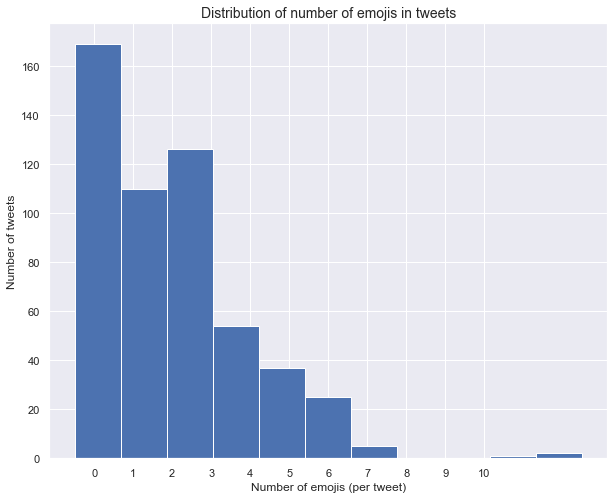

In [70]:
#plot distribution of emoji count
plt.figure(figsize=(10,8))

_ = plt.hist(df_new['emoji_count'], bins=11)

#set ticks
plt.xticks(np.arange(11)+0.5, np.arange(0,11,1))

#set title & labels
plt.title("Distribution of number of emojis in tweets", fontsize=14)
plt.ylabel("Number of tweets")
plt.xlabel("Number of emojis (per tweet)")
plt.show()

The above could also be done with the [emojis library](https://pypi.org/project/emojis/). Like this:

In [71]:
import emojis
for row in df_new['text']:
    c = emojis.count(row)
    #will print count of emoji per row
#     print(c)

In [72]:
#convert series to string 
text_corpus_tk = df_new['text_tokenized'].to_string()
text_corpus= df_new['text'].to_string()
# text_corpus = text_corpus.replace(r"(\n)[0-9]","")

In [73]:
#sum all emojis
emoji_sum = emojis.count(text_corpus)
emoji_sum_tk = emojis.count(text_corpus_tk)

print(emoji_sum, emoji_sum_tk)

544 493


This above is a strange disparity. But looking at the first few rows of the tokenised text explains whre it comes from. If more than 1 emoji appear next to each other, it's counted as one token, rather than separate ones. For further analysis we'll therefore use the higher number as one representing all emojis appearing in the corpus.

We'll count characters per tweet and number of words per tweet, to then check the % of tweet characters that are emoji. Later we'll check what's the most popular emoji. 

In [74]:
#function to count words
def word_count(string):
    split = string.split()
    count = len(split)
    return count

#create a column with word count
df_new['word_count'] = df_new['text'].apply(word_count)

In [75]:
#character count
df_new['character_count'] = [len(each) for each in df_new['text']]

#total number of characters
sum_of_characters = df_new['character_count'].sum()
sum_of_words = df_new['word_count'].sum()

print(f'''The percentage of emoji among all characters is {round((emoji_sum/sum_of_characters)*100,2)}%.
\nAnd the percentage of emoji among all words is: {round((emoji_sum/sum_of_words)*100,2)}%
''')

The percentage of emoji among all characters is 0.53%.

And the percentage of emoji among all words is: 3.59%



In [76]:
df_new['emoji_percent'] = (df_new['emoji_count']/df_new['character_count'])*100

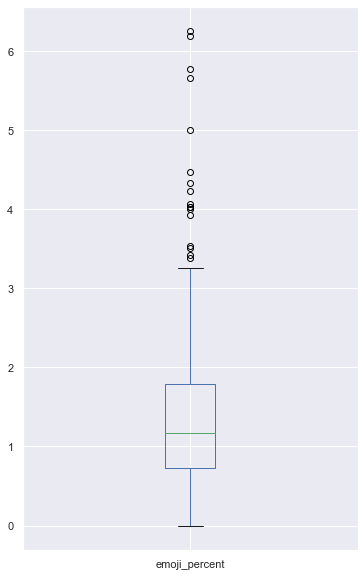

In [77]:
plt.figure(figsize=(6,10))
_ = df_new['emoji_percent'].plot.box()

In [78]:
df_new['emoji_percent'].describe()

count    529.000000
mean       1.334673
std        0.936297
min        0.000000
25%        0.727273
50%        1.176471
75%        1.785714
max        6.250000
Name: emoji_percent, dtype: float64

In [79]:
df_new['emoji_count'].describe()

count    529.000000
mean       2.567108
std        1.819438
min        0.000000
25%        1.000000
50%        2.000000
75%        3.000000
max       13.000000
Name: emoji_count, dtype: float64

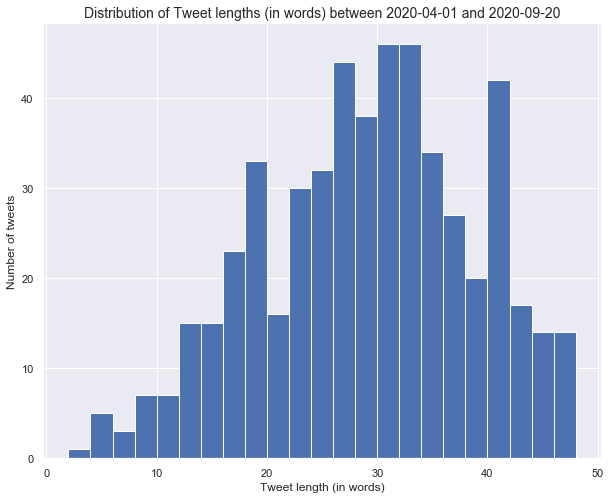

In [80]:
#plot distribution of tweet lengths
#calculate optimal number of bins
bins = int(np.sqrt(len(df_new['word_count'])))

plt.figure(figsize=(10,8))

_ = plt.hist(df_new['word_count'], bins=bins)

#set title & labels
plt.title(f"Distribution of Tweet lengths (in words) between {earliest_tweet} and {latest_tweet}", fontsize = 14)
plt.ylabel("Number of tweets")
plt.xlabel("Tweet length (in words)")
plt.show()

In [81]:
from nltk.corpus import stopwords
from collections import Counter

In [82]:
#create a corpus
#remove stopwords
stop_words = set(stopwords.words('english'))

words_filtered = []

for row in df_new['text_tokenized']:
    for w in row:
        if w not in stop_words:
            words_filtered.append(w)
            
print(len(words_filtered))
c = Counter(words_filtered)

#return most common
c.most_common(10)

16133


[(':', 720),
 ('@', 701),
 ('#', 636),
 ('https', 608),
 ('.', 577),
 ('!', 484),
 ('?', 312),
 (',', 308),
 ('product', 208),
 ('&', 193)]

In [83]:
#turn counter into a dictionary
d_c = dict(c)

#list all emojis found in the counter
emoji_list = []
for item in d_c:
    if char_is_emoji(item):
        emoji_list.append(item)

In [84]:
#start a new dictinary for the frequency of emojis
emoji_dict = {}

for emoji in d_c:
    v = c[emoji]
    if emoji in emoji_list:
        emoji_dict[emoji] = v

In [85]:
#sort the emoji by frequency
sorted_emojis = {key: value for key, value in sorted(emoji_dict.items(), key=lambda item: item[1], reverse=True)}

In [86]:
#get top 30 values
import itertools
top_30_emoji = dict(itertools.islice(sorted_emojis.items(), 30))
top_30_emoji_series=pd.Series(top_30_emoji)

In [87]:
e_list =[]
for each in top_30_emoji_series.index:
    e = emojis.decode(each)
    e_list.append(e)
    
e_df = pd.DataFrame({'emoji':top_30_emoji_series.index, 'freq': top_30_emoji_series.values})
e_df['decoded']= e_list
e_df

,emoji,freq,decoded
0,👉,82,:point_right:
1,👌,49,:ok_hand:
2,✅,47,:white_check_mark:
3,🔥,45,:fire:
4,👀,34,:eyes:
5,😉,33,:wink:
6,🤔,28,:thinking:
7,😅,22,:sweat_smile:
8,🤩,20,:star_struck:
9,🚨,18,:rotating_light:


/Applications/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 127903 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Applications/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:176: RuntimeWarning: Glyph 127903 missing from current font.
  font.load_char(ord(s), flags=flags)


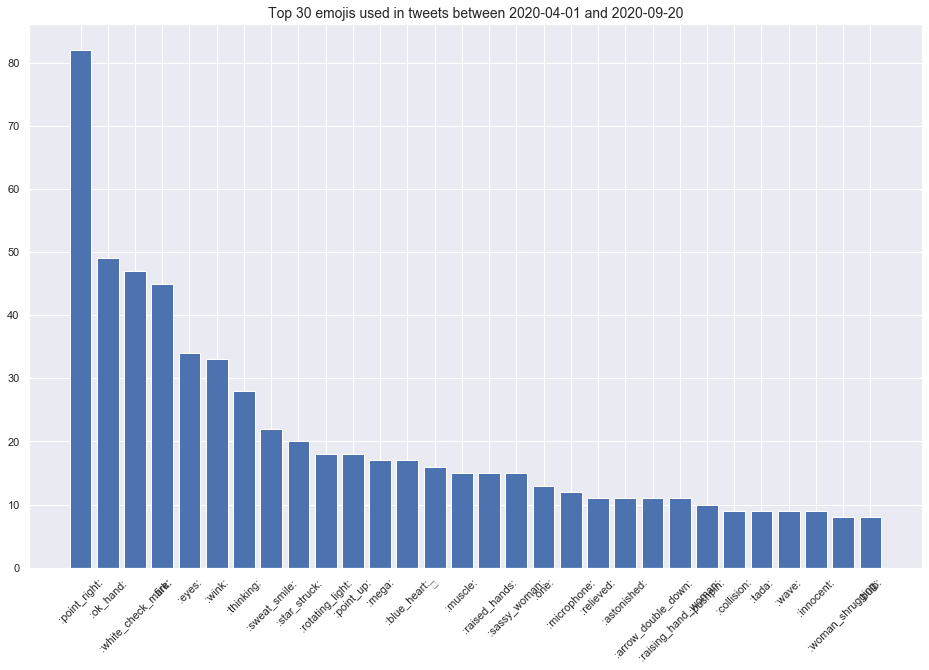

In [88]:
#plot frequency of top emoji
symbols = e_df['decoded']
values = e_df['freq']

fig = plt.figure(figsize=(16,10))

_ = plt.bar(symbols, height=values)
plt.title(f"Top 30 emojis used in tweets between {earliest_tweet} and {latest_tweet}", fontsize=14)
plt.xticks(rotation=45)
plt.show()

In [89]:
#create function to plot a chosen number of top emoji
def plot_top_emoji(number):
    #get top 'number' values
    top_emoji = dict(itertools.islice(sorted_emojis.items(), number))
    
    #convert into a series
    top_emoji_series=pd.Series(top_emoji)
    
    #create a list of decoded emojis
    e_list =[]
    for each in top_emoji_series.index:
        e = emojis.decode(each)
        e_list.append(e)
    
    #convert into a df and append a list of decoded emojis
    e_df = pd.DataFrame({'emoji':top_emoji_series.index, 'freq': top_emoji_series.values})
    e_df['decoded']= e_list
    
    #plot
    symbols = e_df['decoded']
    values = e_df['freq']

    fig = plt.figure(figsize=(10,8))
    _ = plt.bar(symbols, height= values)
    
    #format title and labels
    title = f"Top {number} emojis used between {earliest_tweet} and {latest_tweet}"
    plt.title(title, fontsize=14)
    plt.xticks(rotation=45)
    plt.show()
    
    print("The decoded emojis are", list(top_emoji_series.index))

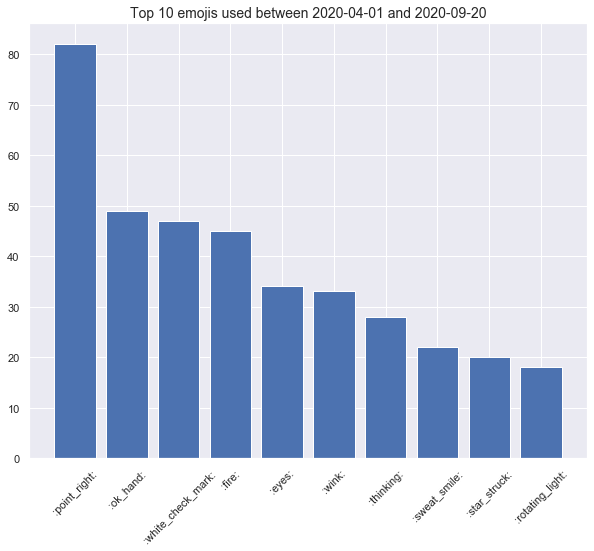

The decoded emojis are ['👉', '👌', '✅', '🔥', '👀', '😉', '🤔', '😅', '🤩', '🚨']


In [90]:
plot_top_emoji(10)

We can check if number of emoji in a tweet correlates with any engagement metric. This is done later in the notebook.

## 4. Analysis of words

To get most frequent words we can use the text column to create a corpus. We'll combine it into one string, then standardize the words, remove punctuation and stop words and then count frequency. We will display it as a graph and as a word cloud.

In [91]:
long_text = [' '.join(row) for row in df_new['text_tokenized']]
long_string = ''.join(long_text)

In [92]:
from nltk.tokenize import RegexpTokenizer

tokenizer = RegexpTokenizer(r'\w+')

# #remove punctuation and lowercase the words
str_no_punct = tokenizer.tokenize(long_string.lower())

In [93]:
#remove stopwords
from nltk.corpus import stopwords

sw = set(stopwords.words('english'))
    
string_no_sw = [word for word in str_no_punct if word not in sw]
#remove numbers
string_no_num = [word for word in string_no_sw if word.isalpha()]

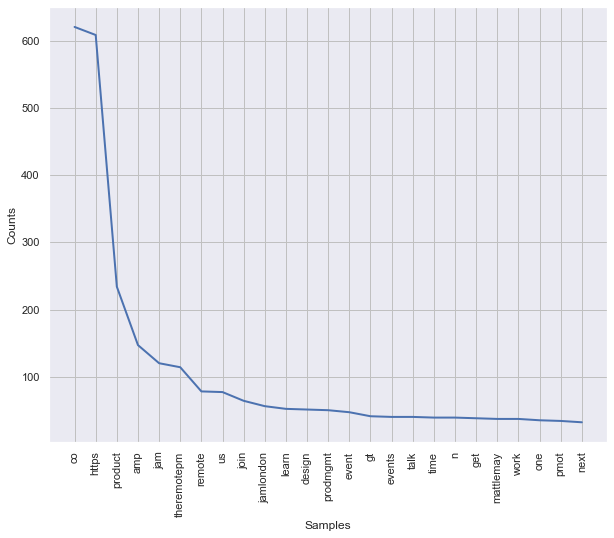

In [94]:
# create a word frequency distribution
freqdist = nltk.FreqDist(string_no_num)

fig = plt.figure(figsize=(10,8))
# plot the distribution
freqdist.plot(25)

In [95]:
#need to remove some words here
c = Counter(string_no_num)
c.most_common(30)

[('co', 621),
 ('https', 609),
 ('product', 234),
 ('amp', 147),
 ('jam', 120),
 ('theremotepm', 114),
 ('remote', 78),
 ('us', 77),
 ('join', 64),
 ('jamlondon', 56),
 ('learn', 52),
 ('design', 51),
 ('prodmgmt', 50),
 ('event', 47),
 ('gt', 41),
 ('events', 40),
 ('talk', 40),
 ('time', 39),
 ('n', 39),
 ('get', 38),
 ('mattlemay', 37),
 ('work', 37),
 ('one', 35),
 ('pmot', 34),
 ('next', 32),
 ('lessons', 31),
 ('watch', 31),
 ('want', 30),
 ('like', 30),
 ('share', 29)]

In [96]:
#add more stopwords 
more_sw = ['https', 'http', 'co', 't','amp','gt','n', 'us', 'jam', 'london']
for w in more_sw:
    sw.add(w)
    
#recreate the list
string_no_sw_2 = [word for word in string_no_num if word not in sw]

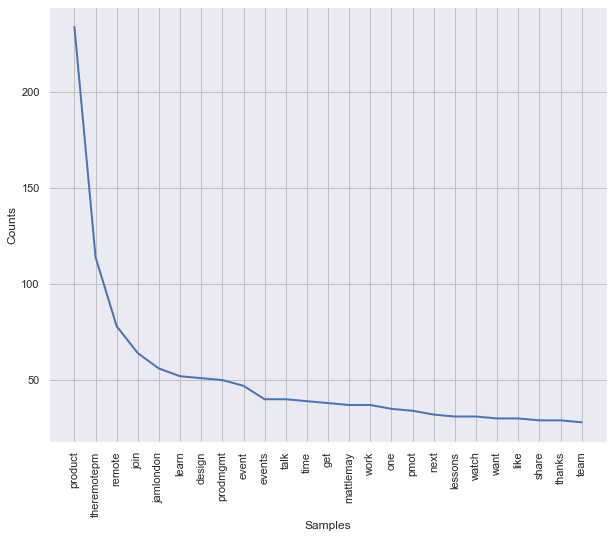

In [97]:
# create a word frequency distribution
freqdist = nltk.FreqDist(string_no_sw_2)

plt.figure(figsize=(10,8))

# plot the distribution
_ = freqdist.plot(25)

In [98]:
from wordcloud import WordCloud

#convert to string
wc_str = ' '.join([str(e) for e in string_no_sw_2]) 

wc = WordCloud(max_words=50, colormap='mako', background_color='white').generate(wc_str)

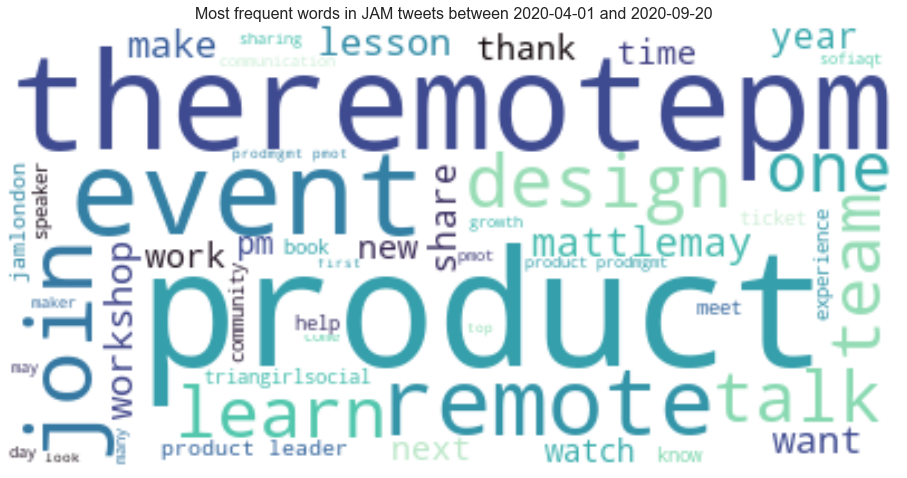

In [99]:
fig = plt.figure(figsize=(16,10))
plt.imshow(wc, interpolation='bilinear')
plt.title(f"Most frequent words in JAM tweets between {earliest_tweet} and {latest_tweet}", fontsize = 16)
plt.axis('off')
plt.show()

In [100]:
#initialise count verctoriser to get bi & trigrams without stopwords
def top_n_bitri_grams(corpus, n=None):
    v = CountVectorizer(ngram_range=(2,3), stop_words=sw)
    X = v.fit_transform(corpus)
    bi_tri_df = pd.DataFrame(X.toarray(), columns = v.get_feature_names())
    #sum the values in each columns
    bi_tri_summed = bi_tri_df.sum()
    #rename the columns
    top_n = pd.DataFrame({'ngram': bi_tri_summed.index, 'count':  bi_tri_summed.values})
    #sort and return top n values if given, otherwise just a sorted df
    top_n = top_n.sort_values(by='count', ascending=False).head(n)
    return top_n

In [101]:
#get top 10
top_10_bi_tri = top_n_bitri_grams(df_new['text'],10)

Text(0.5, 1.0, 'Top 10 bi & tri grams in JAM tweets')

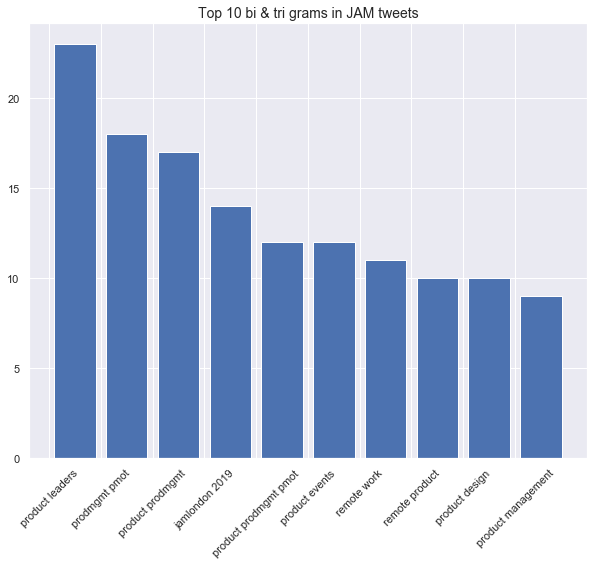

In [102]:
#plot top 10 bi & trigrams
fig, ax = plt.subplots(figsize=(10,8))

labels = top_10_bi_tri['ngram']
x= np.arange(len(labels))
y= top_10_bi_tri['count']

ax.set_xticks(x)
ax.set_xticklabels(labels, rotation=45)
plt.bar(x+0.5, height=y)
plt.title("Top 10 bi & tri grams in JAM tweets", fontsize=14)

# Predicting enagement based on words


We can predict engagement based on words alone,and then on other features (like day of the week, hour, date). Emojis and mentions will be included in the vectorizer, but we can add count of emoji, count of hashtags, and of mentions. The vectorizer presumably doesn't see them as a special type of a category.

In [103]:
df_new['text_tokenized'].head()

0    [🚨, Last, clue, !, Who, 's, the, host, of, #, ...
1    [Can, YOU, guess, who, the, host, of, #, JAMOn...
2    [What, do, you, think, JAM, stands, for, ?, 🟡,...
3    [Guess, :, who, ’, s, the, host, of, #, JAMOnl...
4    [💥, Fantastic, ., Amazing, ., Huge, ., Yup, ,,...
Name: text_tokenized, dtype: object

In [104]:
#create a column with a number of links in a tweet
import re
df_new['link_count'] = df_new['text'].str.count(r'(http)')
df_new['link_count'].head(3)

0    1
1    1
2    0
Name: link_count, dtype: int64

We will remove the links from the text before vectorizing, since they'd be vectorized in a weird way...?? Maybe that's  not necessary, cos tf-idf will deal with the bizarre words number mobos that are parts of domains. And domain names, if they repeat will be assigned appropriate weight. Ok, let's not remove.

In [105]:
#import modules for prediction
import random; random.seed(53)
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import accuracy_score

In [106]:
#cehck for nans
df_new.isna().sum()

text                0
impressions         0
engagements         0
engagement_rate     0
retweets            0
replies             0
likes               0
profile_clicks      0
url_clicks          0
hashtag_clicks      0
detail_expands      0
permalink_clicks    0
date                0
hour                0
day                 0
day_name            0
sum_hashtags        0
sum_mentions        0
hashtags_list       0
mentions_list       0
text_tokenized      0
emoji_count         0
word_count          0
character_count     0
emoji_percent       0
link_count          0
dtype: int64

In [107]:
df_new.dropna(inplace=True)

We'll need to create a binary target variable. We'll transform the engagemtn rate column into a binary variable of high v low engagement. High engagement is above the median, and low is below the median.

In [108]:
median = df_new['engagement_rate'].median()
len(df_new[df_new['engagement_rate']>median])

264

In [109]:
#create a new column

df_new['target'] = np.where((df_new['engagement_rate']>median), 1, 0)
df_new['target'].value_counts() 

0    265
1    264
Name: target, dtype: int64

In [110]:
#create target 
y = df_new['target']

#create train and test set
X_train, X_test, y_train, y_test = train_test_split(df_new.text, y, random_state=53, test_size=.33)

In [111]:
# initialize count vectorizer with english stopwords eliminating the least and most frequent words
count_vectorizer = CountVectorizer(stop_words='english', ngram_range=(1,3), min_df=.05, max_df=.9)

# create count train and test variables
count_train = count_vectorizer.fit_transform(X_train, y_train)
count_test = count_vectorizer.transform(X_test)

# initialize tfidf vectorizer
tfidf_vectorizer = TfidfVectorizer(stop_words='english',ngram_range=(1,3), min_df=.05, max_df=0.9)

# create tfidf train and test variables
tfidf_train = tfidf_vectorizer.fit_transform(X_train, y_train)
tfidf_test = tfidf_vectorizer.transform(X_test)

In [112]:
# create a MulitnomialNB model
tfidf_nb = MultinomialNB()
tfidf_nb.fit(tfidf_train, y_train)

# get predictions
tfidf_nb_pred = tfidf_nb.predict(tfidf_test)

# calculate accuracy
tfidf_nb_score = accuracy_score(y_test, tfidf_nb_pred)

# create a MulitnomialNB model
count_nb = MultinomialNB()
count_nb.fit(count_train, y_train)

# get predictions
count_nb_pred = count_nb.predict(count_test)

# calculate accuracy
count_nb_score = accuracy_score(y_test, count_nb_pred)

print('NaiveBayes Tfidf Score: ', tfidf_nb_score)
print('NaiveBayes Count Score: ', count_nb_score)

NaiveBayes Tfidf Score:  0.5142857142857142
NaiveBayes Count Score:  0.5314285714285715


These results are slightly better than chance. Looks like it's hard to predict engagement based on words alone. We can try linear regression.

In [113]:
#try linear regression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

y_new = df_new['engagement_rate']

#create new train & test set
X_train, X_test, y_train, y_test = train_test_split(df_new.text, y_new, random_state=53, test_size=.33)

# initialize tfidf vectorizer
tfidf_vectorizer = TfidfVectorizer(stop_words='english', min_df=.05, max_df=0.9)

# create tfidf train and test variables
tfidf_train = tfidf_vectorizer.fit_transform(X_train, y_train)
tfidf_test = tfidf_vectorizer.transform(X_test)

#initialise model
lr = LinearRegression()

#fit & predict
lr.fit(tfidf_train, y_train)
lr_pred = lr.predict(tfidf_test)

lr_score = mean_squared_error(y_test, lr_pred)

In [114]:
from sklearn.linear_model import Ridge
clf = Ridge(alpha=1.0, random_state=241)

# train model on data
clf.fit(tfidf_train, y_train) 

clf_pred = clf.predict(tfidf_test)
ridge_score = mean_squared_error(y_test, clf_pred)
print("The linear regression MSE is:", lr_score, "\nThe MSE from ridge regression is:", ridge_score)

The linear regression MSE is: 0.0005419101646761039 
The MSE from ridge regression is: 0.0005304643951304017


In [185]:
#get top 10 keywords
feature_names = np.array(tfidf_vectorizer.get_feature_names())
tfidf_sorting = np.argsort(feature_names.flatten())[::-1]
top_10 = feature_names[tfidf_sorting][:10]
bottom_10 = feature_names[tfidf_sorting][-10:]
print(f'''Top 10 keywords which have been more likely to elicit higher engagement rate are: 
{top_10}, and top 10 keywords which were present in the tweets with lower engagement were: {bottom_10}''')

Top 10 keywords which have been more likely to elicit higher engagement rate are: 
['work' 'watch' 'time' 'theremotepm' 'team' 'talk' 'share' 'remote'
 'product' 'prodmgmt'], and top 10 keywords which were present in the tweets with lower engagement were: ['jamlondon' 'jam' 'https' 'gt' 'events' 'event' 'don' 'design' 'amp'
 '2020']


## Tweet sentiment

We can later use other values as predictors of engagement: number of #, emojis and mentions, tweet length, and sentiment.

To start, we'll create columns with sentiment analysis. To do it we can use the VADER Sentiment Lexicon model, aimed specifically at sentiment analysis on social media.

In [116]:
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/martakrzeminska/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [117]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sid = SentimentIntensityAnalyzer()

In [118]:
#create a new column with sentiment
df_new['sentiment'] = df_new['text'].apply(lambda x: sid.polarity_scores(x))
df_new['sentiment'].head(2)

0    {'neg': 0.0, 'neu': 0.854, 'pos': 0.146, 'comp...
1    {'neg': 0.123, 'neu': 0.877, 'pos': 0.0, 'comp...
Name: sentiment, dtype: object

In [119]:
#check how many nagative positive and neutral scores we have for all tweets
tweet_scores = {'positive': 0, 'negative':0, 'neutral':0}

for index, row in df_new.iterrows():
    text = row['text']
    scores = sid.polarity_scores(text)
    if scores['compound'] >= 0.05:
        tweet_scores['positive'] +=1
    if scores['compound'] <= -0.05:
        tweet_scores['negative'] +=1
    if (scores['compound'] > -0.05) and (scores['compound'] < 0.05):
        tweet_scores['neutral'] +=1
    
tweet_scores

{'positive': 380, 'negative': 69, 'neutral': 80}

This is anunexpected result, perhaps the threshold for negatvity should be set as higher? We can examine some of the tweets that have been interpreted as negative. But first, let's create numerical columns for sentiment.

In [120]:
df_new['sentiment_negative'] = (df_new['sentiment'].astype(str)
                                .str.split(",", n=1, expand=True)
                                .loc[:,0]
                                .str.replace("{'neg':","")
                                .str.strip()
                                .astype(float)
                               )

In [121]:
df_new['sentiment_neutral'] = (df_new['sentiment'].astype(str)
                                .str.split(",", n=2, expand=True)
                                .loc[:,1]
                                .str.replace("'neu':","")
                                .str.strip()
                                .astype(float)
                              )

In [122]:
df_new['sentiment_positive'] = (df_new['sentiment'].astype(str)
                                .str.rsplit(",", n=2, expand=True)
                                .loc[:,1]
                                .str.replace("'pos':","")
                                .str.strip()
                                .astype(float)
                               )

In [123]:
df_new['sentiment_compound'] = (df_new['sentiment'].astype(str)
                                .str.split(",", n=4, expand=True)
                                .loc[:,3]
                                .str.replace("'compound':","")
                                .str.replace('}','')
                                .str.strip()
                                .astype(float)
                               )

In [124]:
#filter the dataframe to get tweets with low comound score
negative_tweets = df_new[df_new['sentiment_compound']< -0.5]
negative_tweets =  negative_tweets[['text', 'sentiment_compound']]
#pick top 10
top_10_negative = negative_tweets.sort_values(by='sentiment_compound').head(10)
top_10_negative

,text,sentiment_compound
10,"👌 Be your product's worst critic, said @susana...",-0.8442
32,"👌 Be your product's worst critic, said @susana...",-0.8442
45,"👌 Be your product's worst critic, said @susana...",-0.8442
60,"👌 Be your product's worst critic, said @susana...",-0.8442
51,Connect with #product designers from Barcelona...,-0.7877
131,Connect with #product designers from Barcelona...,-0.7877
12,"👉 You want to give a talk, but have no ideas....",-0.7772
61,"@RevolutApp Hi there, we've had our payments f...",-0.7191
28,😅 Is there any day in #product life were there...,-0.7096
43,😅 Is there any day in #product life were there...,-0.7096


In [125]:
#examine two tweets with lowest scores
print(top_10_negative.iloc[0,0])
print("\n", top_10_negative.iloc[4,0])

👌 Be your product's worst critic, said @susanavlopes from @onfido at #JAMLondon 2019.

What's the latest criticism you've given to your #product? https://t.co/SxJbmrtQQu

 Connect with #product designers from Barcelona!  🇪🇸🎨 

How? 

Follow this list (Come on, who doesn't like a good list! ) 👉 https://t.co/gy2bZjyXmy

Anyone missing? Tweet at us so we can add them! #pmot #design #prodmgmt


My assumption is that it's the presence of negation, negative superlatives, and words like "criticism" or "missing" that contribute to the sentiment analyzer classifying the tweets as negative. 

In [126]:
df_new.columns

Index(['text', 'impressions', 'engagements', 'engagement_rate', 'retweets',
       'replies', 'likes', 'profile_clicks', 'url_clicks', 'hashtag_clicks',
       'detail_expands', 'permalink_clicks', 'date', 'hour', 'day', 'day_name',
       'sum_hashtags', 'sum_mentions', 'hashtags_list', 'mentions_list',
       'text_tokenized', 'emoji_count', 'word_count', 'character_count',
       'emoji_percent', 'link_count', 'target', 'sentiment',
       'sentiment_negative', 'sentiment_neutral', 'sentiment_positive',
       'sentiment_compound'],
      dtype='object')

In [127]:
#create a new df for prediciton
df_pred = df_new[['target', 'day', 'sum_hashtags', 'sum_mentions',
                  'emoji_count','character_count', 'word_count','link_count','sentiment_negative',
                   'sentiment_neutral', 'sentiment_positive']]

In [128]:
df_pred.head()

,target,day,sum_hashtags,sum_mentions,emoji_count,character_count,word_count,link_count,sentiment_negative,sentiment_neutral,sentiment_positive
0,0,4,1,0,2,167,24,1,0.000,0.854,0.146
1,0,4,1,2,2,201,33,1,0.123,0.877,0.000
2,0,4,1,0,4,155,27,0,0.000,0.713,0.287
3,1,4,1,0,1,154,24,1,0.000,1.000,0.000
4,0,4,3,2,2,222,29,2,0.000,0.654,0.346


In [129]:
features = df_pred.iloc[:,1:]
prediction = df_pred.iloc[:,0]

#normalize all features
from sklearn.preprocessing import StandardScaler
x = features.values
x = StandardScaler().fit_transform(x)

In [130]:
#check mean and std
np.mean(x),np.std(x)

(-2.0315612246448988e-17, 1.0)

In [131]:
#create a df of features
feat_cols = ['feature'+str(i) for i in range(x.shape[1])]
normalised_twitter = pd.DataFrame(x,columns=feat_cols)
normalised_twitter.head()

,feature0,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,feature9
0,1.176427,-0.156173,-0.784835,-0.311989,-0.454815,-0.475241,-0.222718,-0.500750,0.340815,-0.087339
1,1.176427,-0.156173,0.399695,-0.311989,0.085889,0.452443,-0.222718,1.439249,0.524761,-1.261291
2,1.176427,-0.156173,-0.784835,0.788292,-0.645652,-0.166013,-1.695439,-0.500750,-0.786855,1.046409
3,1.176427,-0.156173,-0.784835,-0.862129,-0.661555,-0.475241,-0.222718,-0.500750,1.508474,-1.261291
4,1.176427,1.388045,0.399695,-0.311989,0.419853,0.040139,1.250003,-0.500750,-1.258717,1.520815


In [132]:
#use PCA to pick 2 principal components
from sklearn.decomposition import PCA

#instantiate PCA
pca_twitter = PCA(n_components=2)
pca_twitter_ft = pca_twitter.fit_transform(x)

In [133]:
#create a df 
pca_twitter_df = pd.DataFrame(data=pca_twitter_ft, columns=['component_1', 'component_2'])

In [134]:
print('Explained variation per principal component: {}'.format(pca_twitter.explained_variance_ratio_))

Explained variation per principal component: [0.30078359 0.16638168]


The first component explains ~30% of the variance while the second around 17%.

We'll create a new df for linear regression, removing components: char count, sentment negative and neutral to prevent multicollinearity.

In [135]:
#create a df for linear regression, 
df_pred_lr = df_new[['engagement_rate', 'day', 'sum_hashtags', 'sum_mentions',
                  'emoji_count', 'word_count','link_count', 'sentiment_positive']]
x_lr = df_pred_lr.iloc[:,1:]
x_lr.head()

,day,sum_hashtags,sum_mentions,emoji_count,word_count,link_count,sentiment_positive
0,4,1,0,2,24,1,0.146
1,4,1,2,2,33,1,0.000
2,4,1,0,4,27,0,0.287
3,4,1,0,1,24,1,0.000
4,4,3,2,2,29,2,0.346


In [136]:
y_lr = df_pred_lr['engagement_rate']

#create new train & test set
X_train, X_test, y_train, y_test = train_test_split(x_lr, y_lr, random_state=53, test_size=.33)

#initialise model
lr = LinearRegression()

#fit & predict
lr.fit(X_train, y_train)
lr_pred = lr.predict(X_test)

lr_score = mean_squared_error(y_test, lr_pred)
print(lr_score)

0.0004885146520485771


MSE of 0.05%? Is this even possible?


Let's see what engagement we'd predict for a tweet sent on Monday, with 3 hashtags, 4 mentions, 2 emojis, 30 words, 1 link and mean value of positive sentiment.

In [137]:
x_lr['sentiment_positive'].mean()

0.15686200378071827

In [138]:
mon_tweet_1 = lr.predict([[0,3,4,2,30,1,0.156]])

#change only the val of mentions
mon_tweet_2 = lr.predict([[0,3,1,2,30,1,0.156]])

print(mon_tweet_1, mon_tweet_2)

[0.02308898] [0.01398735]


Check values for different days of the week with other parameters constant: 3 hashtags, 2 mentions, 2 emojis, 20 words, 1 link and mean value of positive sentiment.

In [139]:
#check same values but diff day of the week
l = {}
for item in range(0,7):
    prediction = lr.predict([[item,3,2,2,20,1,0.156]])
    l[item] = prediction
    print("Prediction for day {}".format(item), "is", prediction)
    
print("\nWith given variables the 'best day' to tweet is", sorted(l.items())[0][0], "with predicted engagement rate of", sorted(l.items())[0][1])

Prediction for day 0 is [0.0162451]
Prediction for day 1 is [0.01556526]
Prediction for day 2 is [0.01488542]
Prediction for day 3 is [0.01420558]
Prediction for day 4 is [0.01352574]
Prediction for day 5 is [0.0128459]
Prediction for day 6 is [0.01216606]

With given variables the 'best day' to tweet is 0 with predicted engagement rate of [0.0162451]


Day 0 is Monday.

## Stats by day of the week
Tweet activity varies day by day. It's important to know which days and times are best to tweet (at least based on past performance).

In [140]:
#pick only relevant columns 
week_df = df_new[['impressions', 'engagements', 'engagement_rate', 'sum_hashtags', 'retweets','replies',
                  'likes', 'profile_clicks', 'url_clicks', 'sum_mentions','emoji_count', 'character_count', 'date','day','day_name',
                  'word_count', 'character_count', 'word_count', 'link_count', 'sentiment_negative',
                   'sentiment_neutral', 'sentiment_positive', 'sentiment_compound']]

In [141]:
# create a group by object
weekday_grouped = df_new.groupby('day_name')

#create a df with means sorted by day
week_mean = weekday_grouped.mean().sort_values(by="day")
week_mean_norm = StandardScaler().fit_transform(week_mean.values)
week_mean_norm_df =  pd.DataFrame(week_mean_norm, columns=week_mean.columns, index= week_mean.index)
week_mean_norm_df

,impressions,engagements,engagement_rate,retweets,replies,likes,profile_clicks,url_clicks,hashtag_clicks,detail_expands,...,emoji_count,word_count,character_count,emoji_percent,link_count,target,sentiment_negative,sentiment_neutral,sentiment_positive,sentiment_compound
day_name,,,,,,,,,,,,,,,,,,,,,
Monday,1.467947,1.292966,0.187296,0.505388,-0.709657,1.142178,1.303656,1.615167,-0.461341,1.040685,...,1.853419,0.728581,1.096354,1.222904,0.853838,0.473790,0.327971,0.274283,-0.316944,-0.057408
Tuesday,0.917073,1.198434,0.557487,1.681901,0.764865,0.971718,1.243334,1.402444,0.937802,1.675230,...,-0.371883,-0.001294,0.290171,0.909859,0.939253,0.712347,1.040166,1.086254,-1.217262,-1.552179
Wednesday,0.454599,0.817173,1.755181,0.746134,1.759463,1.080766,0.640611,-0.129315,-0.771477,0.482156,...,-0.517188,0.725234,0.324014,-1.004040,0.172547,1.531064,0.774060,0.505137,-0.608413,-0.892286
Thursday,-0.242410,-0.467609,0.322632,-0.213508,0.706956,-0.868655,-0.604679,-0.749308,1.192819,-0.311816,...,-0.747012,0.093883,-0.050393,-0.612751,-0.204197,0.172586,-0.942194,-0.200420,0.335904,0.395010
Friday,0.129695,-0.607756,-0.771661,-0.169889,-0.565064,-0.038102,-0.200509,-0.404199,0.108643,-0.991421,...,-0.285131,1.299714,1.197645,-1.326258,0.939919,-0.887254,0.146152,0.614803,-0.623117,-0.449128
Saturday,-1.319517,-1.383611,-1.646252,-1.404068,-1.181388,-1.467889,-1.415300,-1.165790,-1.801573,-0.984586,...,-1.088028,-1.110854,-1.639186,-0.371342,-1.977249,-1.743511,0.630028,-2.251824,2.107806,1.566935
Sunday,-1.407388,-0.849597,-0.404684,-1.145958,-0.775175,-0.820016,-0.967113,-0.568999,0.795127,-0.910248,...,1.155822,-1.735263,-1.218606,1.181629,-0.724110,-0.259022,-1.976182,-0.028234,0.322025,0.989057


In [142]:
def plot_means_by_weekday(dataframe, variable_1, variable_2=None, variable_3=None):
    #create a figure
    fig, ax = plt.subplots(figsize=(10,8))

    # set x and y axes
    x = dataframe.index
    y1 = dataframe[variable_1]
    #plot
    ax.plot(x, y1, label=variable_1)
    
    #add other plots if variables given
    if variable_2 != None:
        y2 = dataframe[variable_2]
        ax.plot(x, y2, label=variable_2)
        
    if variable_3 != None:
        y3 = dataframe[variable_3]
        ax.plot(x, y3, label=variable_3)

    #format title and labels
    plt.xticks(rotation=45)
    plt.title(f"Average values by day of the week", fontsize=14)
    plt.legend()

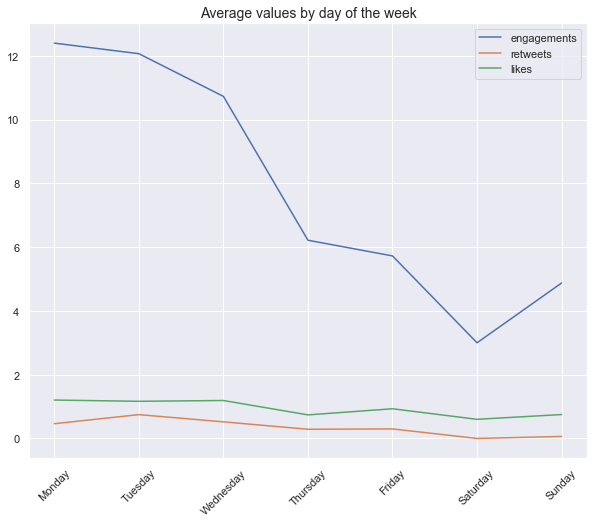

In [143]:
plot_means_by_weekday(week_mean,'engagements', 'retweets', variable_3='likes')

We might want to plot the normalized version. 

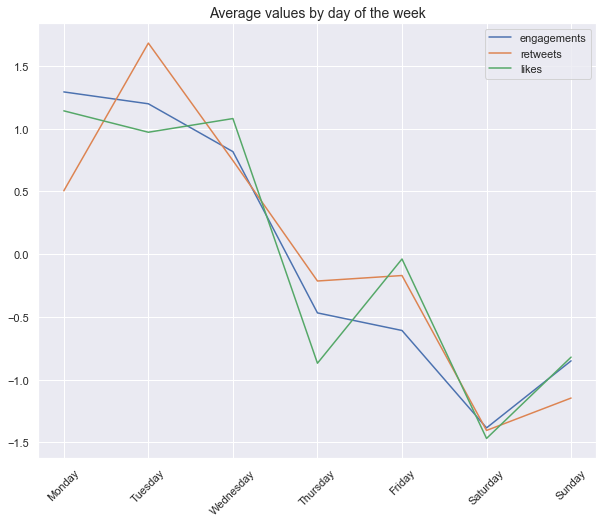

In [144]:
plot_means_by_weekday(week_mean_norm_df, 'engagements', 'retweets', variable_3='likes')

In [180]:
# check top values for positive and negative sentiment
top_positive_d = week_mean_norm_df['sentiment_positive'].sort_values(ascending=False).head(1).index[0]
top_positive_v = week_mean_norm_df['sentiment_positive'].sort_values(ascending=False).head(1)[0]
top_negative_d = week_mean_norm_df['sentiment_negative'].sort_values(ascending=False).head(1).index[0]
top_negative_v = week_mean_norm_df['sentiment_negative'].sort_values(ascending=False).head(1)[0]
print(f"The top value of positive sentiment was observed on {top_positive_d} ({round(top_positive_v, 3)}), and top value of negative sentiment on {top_negative_d} ({round(top_negative_v, 3)}).")

The top value of positive sentiment was observed on Saturday (2.108), and top value of negative sentiment on Tuesday (1.04).


In [179]:
# check bottom values for positive and negative sentiment
top_positive_d = week_mean_norm_df['sentiment_positive'].sort_values(ascending=False).tail(1).index[0]
top_positive_v = week_mean_norm_df['sentiment_positive'].sort_values(ascending=False).tail(1)[0]
top_negative_d = week_mean_norm_df['sentiment_negative'].sort_values(ascending=False).tail(1).index[0]
top_negative_v = week_mean_norm_df['sentiment_negative'].sort_values(ascending=False).tail(1)[0]
print(f"The lowest value of positive sentiment was observed on {top_positive_d} ({round(top_positive_v,3)}), and the lowest value of negative sentiment on {top_negative_d} ({round(top_negative_v,3)}).")

The lowest value of positive sentiment was observed on Tuesday (-1.217), and the lowest value of negative sentiment on Sunday (-1.976).


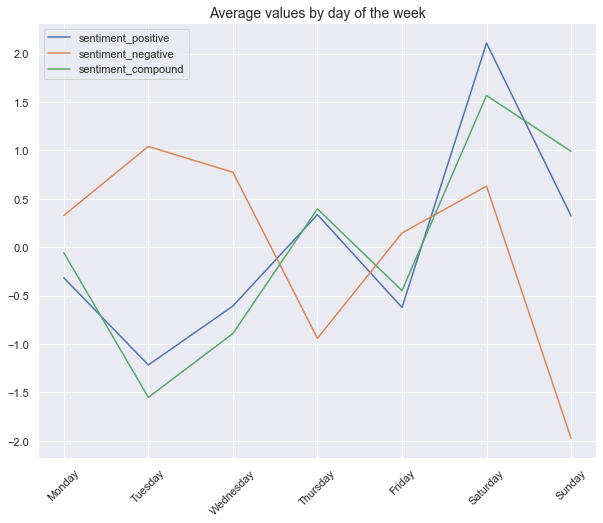

In [147]:
#plot sentiment for week day
plot_means_by_weekday(week_mean_norm_df,'sentiment_positive', 'sentiment_negative', 'sentiment_compound')

There are highest and lowest values in any set of numbers. But, the differences don't seem big enough to be considered significant. To show this numerically, we'd probably need to create bootstrap samples.

**Impressions**
Let's see what we can learn about impressions.

We create a new groupby object because we couldn't sort the previous one by 'day' after using aggregation.

In [148]:
# create a group by object
weekday_grouped_1 = df_new.groupby(['day_name','day'])

In [149]:
#plot number of tweets and mean impressions
weekday_count = weekday_grouped_1.agg(['count','mean'])

#pick the impressions column and turn into a separate df
week_impressions = weekday_count['impressions']
#set index to be the day
week_impressions = week_impressions.reset_index()
week_impressions = week_impressions.set_index('day_name')
#sort days
week_impressions = week_impressions.sort_values(by='day')

week_impressions

,day,count,mean
day_name,,,
Monday,0,93,604.559140
Tuesday,1,91,535.912088
Wednesday,2,121,478.280992
Thursday,3,111,391.423423
Friday,4,87,437.793103
Saturday,5,10,257.200000
Sunday,6,16,246.250000


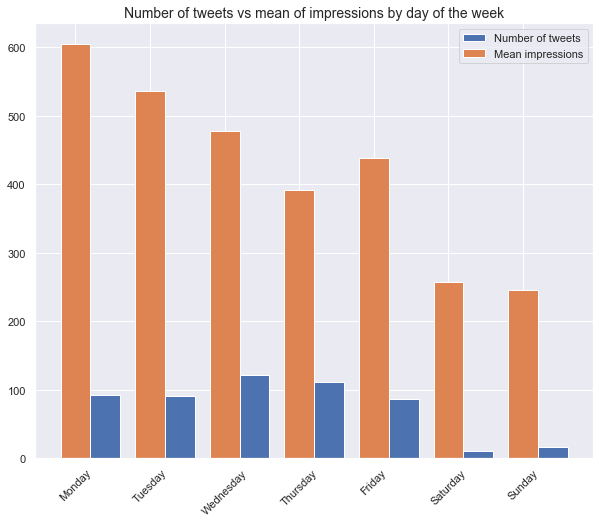

In [150]:
#plot mean impressions
fig, ax = plt.subplots(figsize=(10,8))

labels = week_impressions.index
width = 0.4

# set x and y axes
x = np.arange(len(labels))
y1 = week_impressions['count']
y2 = week_impressions['mean']

#plot
_ = ax.bar(x + width , y1, width, label='Number of tweets')
_ = ax.bar(x, y2, width, label='Mean impressions')

#format title and labels
ax.set_xticks(x)
ax.set_xticklabels(labels, rotation=45)
plt.title("Number of tweets vs mean of impressions by day of the week", fontsize=14)
plt.legend()

If we just look at mean impressions, it seems like Monday, Tuesday, and Wednesday are the best days to tweet. But we can also look at the ratio of number of tweets send to the number of mean impressions received.

In [151]:
#create a column for ratios
s = week_impressions['count']/week_impressions['mean']
week_impressions['ratio'] = s

Text(0.5, 1.0, 'Ratio of tweets vs impressions day of the week')

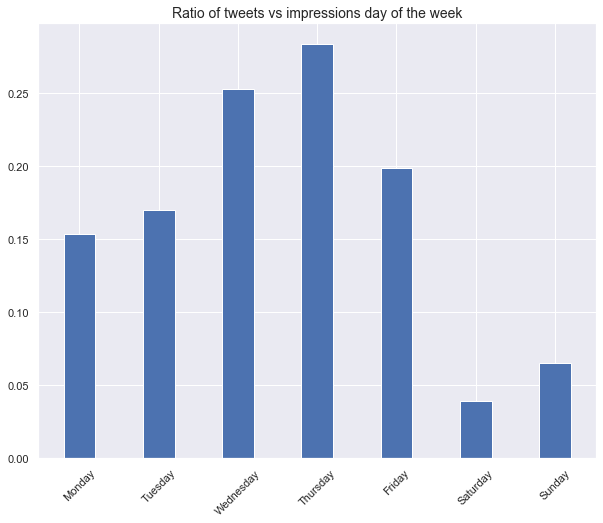

In [152]:
#plot the ratios
#plot mean impressions
fig, ax = plt.subplots(figsize=(10,8))

labels = week_impressions.index

# set x and y axes
x = np.arange(len(labels))
y = week_impressions['ratio']

#plot
_ = ax.bar(x, y, width)

#format title and labels
ax.set_xticks(x)
ax.set_xticklabels(labels)
plt.xticks(rotation=45)
plt.title("Ratio of tweets vs impressions day of the week", fontsize=14)

Looking at this chart it seems that the highest ratio of impressions per tweet is on the weekend. The number of tweets per day is not even. 

It'd probably be good to do some resampling here to see if this difference is significant. 

How would that work?
H0: There is no difference in ratios among days. Could start between two days, e.g.monday Saturday.
An array with count x ratio for each day.
Sample 1000 times. What's the lenght of the sample we need, the length of each day? 

## Correlations

We can calculate if there are any significant correlations between the variables in the twitter dataframe. What's most interestting is to check if the number of hashtags or mentions used correlates positively with engagements or impressions. 

In [153]:
# create a new df for correlations
# pick columns
df_new.columns

Index(['text', 'impressions', 'engagements', 'engagement_rate', 'retweets',
       'replies', 'likes', 'profile_clicks', 'url_clicks', 'hashtag_clicks',
       'detail_expands', 'permalink_clicks', 'date', 'hour', 'day', 'day_name',
       'sum_hashtags', 'sum_mentions', 'hashtags_list', 'mentions_list',
       'text_tokenized', 'emoji_count', 'word_count', 'character_count',
       'emoji_percent', 'link_count', 'target', 'sentiment',
       'sentiment_negative', 'sentiment_neutral', 'sentiment_positive',
       'sentiment_compound'],
      dtype='object')

In [154]:
df_correl = df_new[['impressions', 'engagements', 'engagement_rate', 'retweets',
       'replies', 'likes', 'profile_clicks', 'url_clicks', 'hour', 'day',
       'sum_hashtags', 'sum_mentions', 'emoji_count', 'character_count',
       'word_count', 'link_count', 'sentiment_negative',
       'sentiment_neutral', 'sentiment_positive', 'sentiment_compound']]

In [155]:
#calculate correlations
corr = df_correl.corr()

In [156]:
#pairs of corrlations sorted by value
corr_pairs = corr.unstack().sort_values(kind="quicksort")

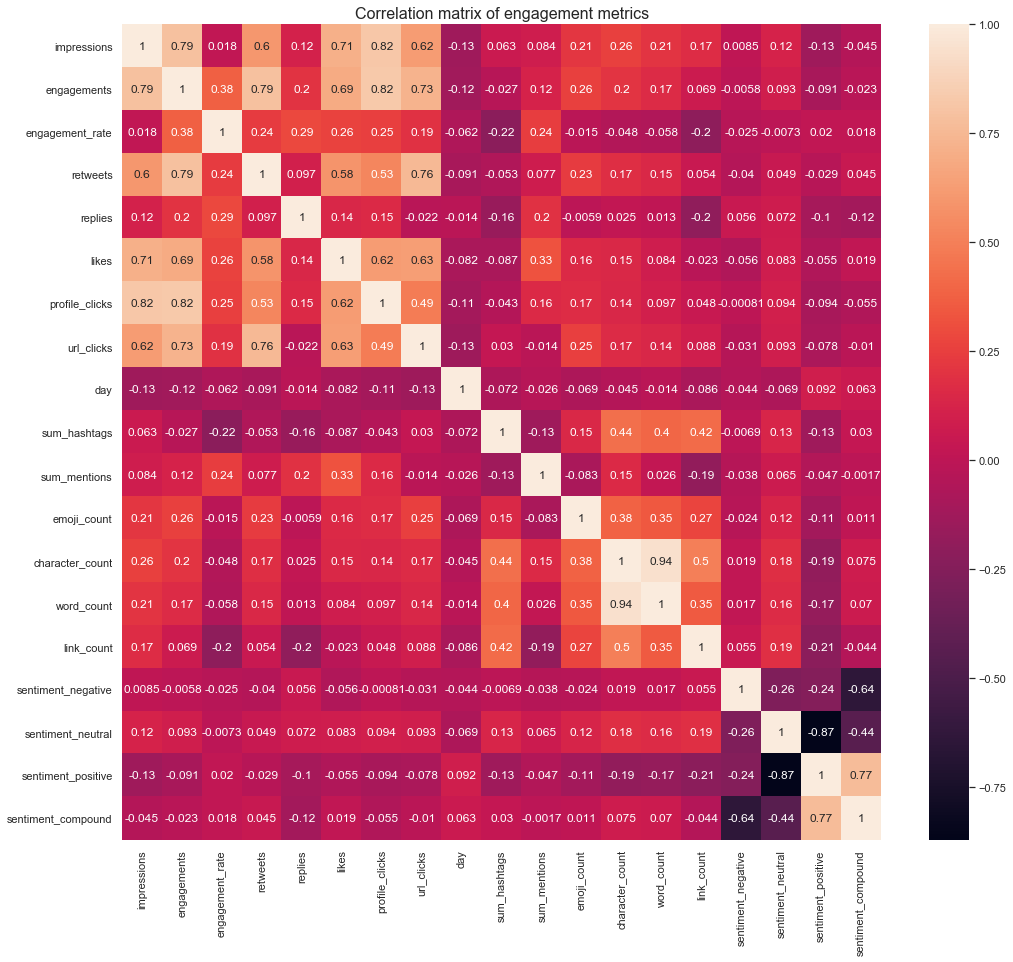

In [178]:
#plot correlations
fig, ax = plt.subplots(figsize=(17,15)) 
_ = sns.heatmap(corr, annot = True, ax=ax)

plt.title("Correlation matrix of engagement metrics", fontsize=16)
plt.show()

In [176]:
#get strong positive
strong_positive = corr_pairs[(corr_pairs >= 0.7) & (corr_pairs < 1)]
# strong get negative correlations
strong_negative = corr_pairs[corr_pairs <= -0.7]
print(f'''There are strong positive correlations between the following pairs of values: \n{strong_positive} 
\nand strong negative correlations between the following pairs of values
\n{strong_negative}
''')

There are strong positive correlations between the following pairs of values: 
likes               impressions           0.709064
impressions         likes                 0.709064
engagements         url_clicks            0.729162
url_clicks          engagements           0.729162
retweets            url_clicks            0.757440
url_clicks          retweets              0.757440
sentiment_positive  sentiment_compound    0.768817
sentiment_compound  sentiment_positive    0.768817
engagements         impressions           0.788857
impressions         engagements           0.788857
engagements         retweets              0.794681
retweets            engagements           0.794681
profile_clicks      impressions           0.821667
impressions         profile_clicks        0.821667
engagements         profile_clicks        0.824717
profile_clicks      engagements           0.824717
character_count     word_count            0.944498
word_count          character_count       0.944498
dty

In [171]:
#get weak positive
weak_positive = corr_pairs[(corr_pairs >= 0.5) & (corr_pairs < 0.7)]
weak_negative = corr_pairs[(corr_pairs > -0.7) & (corr_pairs <= -0.5)]
weak_negative

sentiment_negative  sentiment_compound   -0.639977
sentiment_compound  sentiment_negative   -0.639977
dtype: float64

These results are not surprising. E.g. the more impressions the more engagements, the more engagements the more profile clicks. The more likes the more impressions, the more impressions the more likes, etc.

In [159]:
#check specifics for emoji count
emoji_cor_n_n = corr_pairs['emoji_count'].sort_values().head(1)[0]
emoji_cor_n_t = corr_pairs['emoji_count'].sort_values().head(1).index[0]
emoji_cor_p_n = corr_pairs['emoji_count'].sort_values().tail(2)[0]
emoji_cor_p_t = corr_pairs['emoji_count'].sort_values().tail(2).index[0]
print(f"The number of emojis in a tweet correlates most negatively with {emoji_cor_n_t} ({round(emoji_cor_n_n,3)}), and most positively with {emoji_cor_p_t} ({round(emoji_cor_p_n,3)}).")

The number of emojis in a tweet correlates most negatively with sentiment_positive (-0.113), and most positively with character_count (0.385).


In [160]:
# check specifics for mention count
mention_cor_n_n = corr_pairs['sum_mentions'].sort_values().head(1)[0]
mention_cor_n_t = corr_pairs['sum_mentions'].sort_values().head(1).index[0]
mention_cor_p_n = corr_pairs['sum_mentions'].sort_values().tail(2)[0]
mention_cor_p_t = corr_pairs['sum_mentions'].sort_values().tail(2).index[0]
print(f"The number of mentions correlates most negatively with {mention_cor_n_t} ({round(mention_cor_n_n,3)}), and most positively with {mention_cor_p_t} ({round(mention_cor_p_n,3)}).")

The number of mentions correlates most negatively with link_count (-0.186), and most positively with likes (0.327).


In [161]:
# check specifics for hashtag count
hash_cor_n_n = corr_pairs['sum_hashtags'].sort_values().head(1)[0]
hash_cor_n_t = corr_pairs['sum_hashtags'].sort_values().head(1).index[0]
hash_cor_p_n = corr_pairs['sum_hashtags'].sort_values().tail(2)[0]
hash_cor_p_t = corr_pairs['sum_hashtags'].sort_values().tail(2).index[0]
print(f"The number of hashtags in a tweet correlates most negatively with {hash_cor_n_t} ({round(hash_cor_n_n,3)}), and most positively with {hash_cor_p_t} ({round(hash_cor_p_n,3)}).")

The number of hashtags in a tweet correlates most negatively with engagement_rate (-0.216), and most positively with character_count (0.436).


The above is to say, the more hshtags the longer the tweet :rolling eyes emoji:. Glad I checked with Pearson, cos, you know, until you have the number you can never be sure.

**Conclusion**: The number of mentions, emojis, or hashtags doesn't significantly correlate with any of the engagement 
metrics.

In [162]:
# nlp = spacy.load("en_core_web_sm")
# #this to use if spacy works
# def lemmatize(text):
#     doc = nlp(text)
#     lems = [(token.lemma_) for token in doc]
#     return lems

# def tokenize(text):
#     doc = nlp(text)
#     tokens = [(token.text) for token in doc]
#     return tokens

In [163]:
# #this to use if spacy works
# df_new['lemmas'] = df_new['text'].apply(lemmatize)
# df_new['tokens'] = df_new['text'].apply(tokenize)

In [164]:
# df_new['lemmas'].head()

In [165]:
# #this to use if spacy works
# def count_lemmas(text):
#     doc=nlp(text)
#     words = [word for word in doc if word.isalpha()]
#     s = words.count()
#     return s

In [166]:
##this to use if spacy works
# df_new['n'] = df_new['text'].apply(count_lemmas)
# df_new['n'].head()